# Twitter Sentiment Analysis using NLTK
by Nachiket Patil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Pipeline:

#### Exploratory Data Analysis (EDA)

#### Text Cleaning & Preprocessing (NLTK)
- Lowercasing
- URL & Mention Removal
- Tokenization
- Stopword Removal
- Lemmatization

#### Feature Engineering
- TF-IDF Vectorization (Unigrams + Bigrams)

#### Model Training & Evaluation
- Logistic Regression
- Naive Bayes
- Linear SVM

# Step 1: Loading Data

In [2]:
columns = ["target", "id", "date", "flag", "user", "text"]
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="latin-1", names = columns)

In [3]:
df.head(5)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.shape

(1600000, 6)

### Dataset Overview
Dataset: Twitter Sentiment Dataset (1.6M tweets)
-    1. Rows: 1,600,000
-    2. Columns: 6

In [5]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


`df.info()` gives a concise summary of the dataset structure, data types, and missing values.
- As we can see that the date dtype is object, which has to be in Date format

In [7]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


1. Target Variable Analysis
- The target variable represents the class labels in the dataset.
- The minimum value is 0 and the maximum value is 4.

- The standard deviation is 2.0, showing a wide spread of class values across the dataset.
- The 25th percentile (Q1) is 0, the median (Q2) is 4, and the 75th percentile (Q3) is also 4.
- This indicates that a significant proportion of observations belong to the higher class labels, particularly class 4.

Overall, the target variable is categorical in nature but numerically encoded, making it suitable for classification tasks.

2. ID Column Analysis
- The ids column appears to be a unique identifier for each data record.
- The mean ID value is approximately 2.0 × 10⁹, with a minimum of 1.47 × 10⁹ and a maximum of 2.33 × 10⁹.
- The standard deviation (~1.94 × 10⁸) indicates that the ID values are widely spread.
- Since IDs are meant only for identification and do not carry predictive information, they should not be used as a feature during model training.

# Step 2: EDA

## Target Variable Distribution(Univariate)
# Univariate Analysis:
Univariate data involves observations consisting of only one variable. 
For textual sentiment data, univariate analysis is crucial to:
- Identify structural properties of tweets
- Detect anomalies and noise
- Understand sentiment-wise behavioral patterns

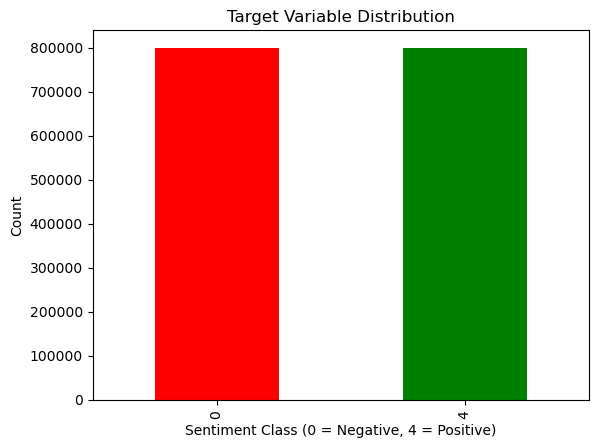

In [10]:
plt.figure()
df['target'].value_counts().sort_index().plot(kind = 'bar', color=['r', 'g'])
plt.title("Target Variable Distribution")
plt.xlabel("Sentiment Class (0 = Negative, 4 = Positive)")
plt.ylabel("Count")
plt.show()

In [11]:
## Key note: The dataset is balanced with equal Positive and Negative tweets

## NLP Analysis

In [12]:
# Character length of tweets
df["char_length"] = df["text"].apply(len)

# Word count of tweets
df["word_count"] = df["text"].apply(lambda x: len(x.split()))

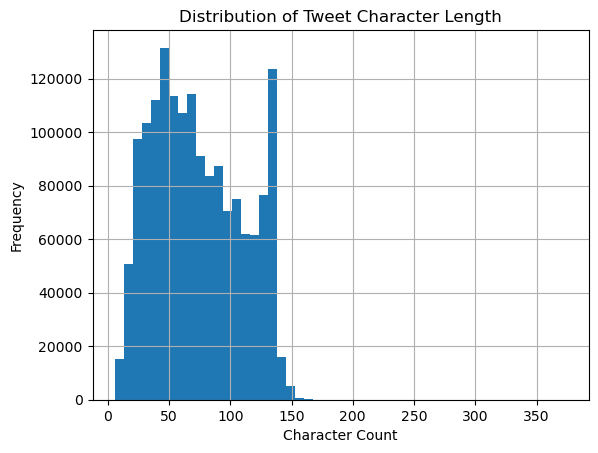

In [13]:
# Univariate Analysis – Character Length
plt.figure()
df["char_length"].hist(bins=50)
plt.title("Distribution of Tweet Character Length")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Key Insights:
# Most Tweets Are Short to Medium Length
# Majority of tweets fall roughly between 30 to 120 characters

# The distribution is positively skewed. 
# Few tweets extend beyond 150 characters. 
# Outliers exist but are not dominant — no aggressive trimming is required

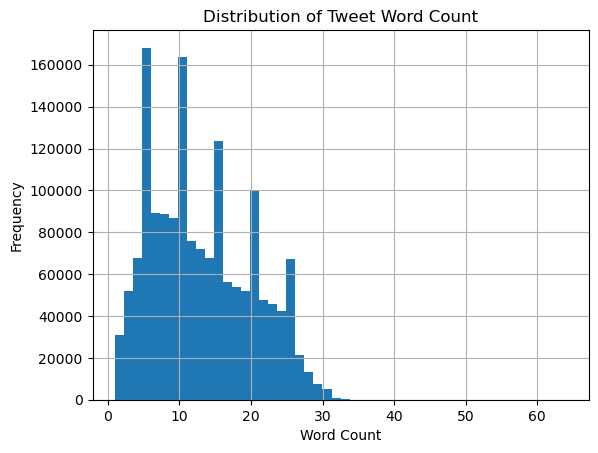

In [15]:
# Univariate Analysis – Word Count
plt.figure()
df["word_count"].hist(bins=50)
plt.title("Distribution of Tweet Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

## Multivariate Analysis – Word Count vs Sentiment

<Figure size 640x480 with 0 Axes>

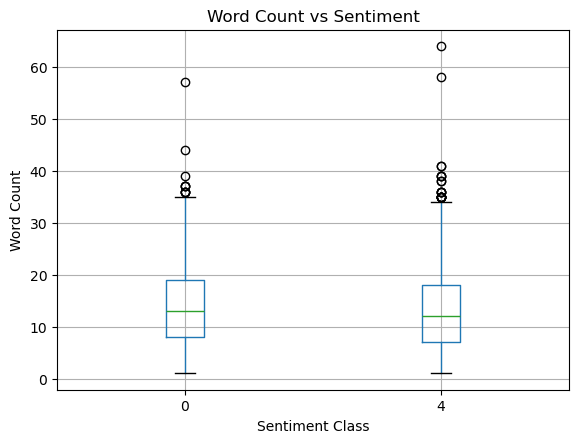

In [16]:
plt.figure()
df.boxplot(column="word_count", by="target")
plt.title("Word Count vs Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment Class")
plt.ylabel("Word Count")
plt.show()

<Figure size 640x480 with 0 Axes>

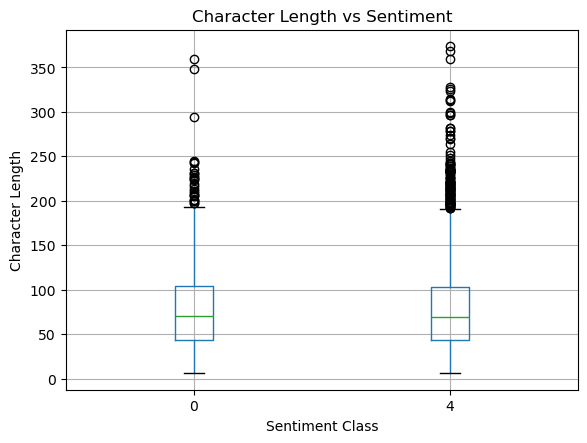

In [17]:
# Multivariate Analysis – Character Length vs Sentiment
plt.figure()
df.boxplot(column="char_length", by="target")
plt.title("Character Length vs Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment Class")
plt.ylabel("Character Length")
plt.show()

In [18]:
# # The character length boxplot shows nearly identical medians and strong overlap across sentiment classes, 
# indicating that tweet length is not a reliable predictor of sentiment.
# This reinforces the decision to focus on semantic text features rather than numeric length-based features.

In [19]:
# # Outliers Exist in Both Positive and Negative Tweets
# Long tweets appear in both sentiment classes

# Likely caused by:
# URLs
# Mentions
# Hashtags
# Spam-like content

### Conclusion
Outliers are not sentiment-specific and should be handled through preprocessing, not feature engineering.

In [20]:
## Grouped Statistics by Sentiment
df.groupby("target")[["char_length", "word_count"]].mean()

,char_length,word_count
target,,
0,74.301790,13.581984
4,73.878433,12.770318


## Step 3: Text Cleaning and NLP Preprocessing
#### We will perform few steps sequentially:
- Drop unnecessary columns
- Convert text to lowercase
- Remove URLs, mentions, hastags, punctuations and numbers
- Perform Tokenization
- Remove stopwords
- Lemmenatization

## What is Tokenization in NLP?

Tokenization is the process of breaking text into smaller units, called tokens.
These tokens can be words, sub-words, characters, or sentences, depending on the task.

Tokenization is one of the first and most important steps in any NLP pipeline because machines cannot understand raw text directly.

Input text: `I am learning Natural Language Processing!`

After tokenization (word-level): `['I', 'am', 'learning', 'Natural', 'Language', 'Processing']`

Why Tokenization is Important

- Converts raw text into processable units
- Enables further NLP steps like:
- Stopword removal
- Stemming / Lemmatization
Vectorization (TF-IDF, Bag of Words)
Reduces ambiguity and noise in text data

Without tokenization, text preprocessing cannot proceed.

There are multiple types of Tokenization used, in this project we have used `Word Tokenization` ( Splits text into individual words. )


## What is Stemming in NLP?

Stemming is a text preprocessing technique in Natural Language Processing (NLP) that reduces words to their root or base form by removing prefixes or suffixes.

The goal of stemming is to treat different grammatical forms of a word as the same feature, thereby reducing vocabulary size and improving model efficiency.

Why Stemming is Used

In real-world text data:

- Words appear in many grammatical forms
- Treating each form separately increases noise
- Models become slower and less generalizable
- Stemming normalizes words by collapsing multiple forms into a single representation.

How Stemming Works

Stemming works by:
- Applying rule-based heuristics
- Removing common suffixes such as:`-ing`, `-ed`,`-s`, `-ly`, `-tion`
- It does not understand context or grammar

Because of this, stemming is:
- Fast
- Simple
- Less accurate than lemmatization.

When to Use Stemming

Use stemming when:
- Speed is important
- Dataset is very large

Avoid stemming when:
- Exact word meaning matters
- Grammar and context are important

## What is Lemmatization in NLP?
Lemmatization is a text preprocessing technique in Natural Language Processing (NLP) that converts words into their base or dictionary form, known as a lemma.

Unlike simple word truncation, lemmatization uses linguistic rules and vocabulary knowledge to ensure that the transformed word is meaningful and valid.
- Ex: Running  -->   Run
-    Cars     -->   Car

Why Lemmatization is Important

In text data, the same word can appear in many forms:

- tense (run, running, ran)
- number (car, cars)
- degree (good, better, best)

Lemmatization normalizes these variations so that the model treats them as the same concept, reducing redundancy and noise.

How Lemmatization Works

Lemmatization:

- Analyzes the context of a word
- Identifies its part of speech (POS) (noun, verb, adjective)
- Uses a lexical database to find the correct base form

This is why lemmatization is more accurate but computationally heavier.

When to Use Lemmatization

Use lemmatization when:
- Text meaning matters (sentiment analysis, topic modeling)
- You want high-quality linguistic features
- Dataset size is manageable

In [21]:
# Drop unnecessary columns
df = df[["text", "target"]]
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [22]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)
    
    # Remove punctuation and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]
    
    # Join tokens back to text
    return " ".join(tokens)

In [24]:
df["clean_text"] = df["text"].apply(clean_tweet)
df.head()

,text,target,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,0,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,0,dived many time ball managed save rest bound
3,my whole body feels itchy and like its on fire,0,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",0,behaving mad cant see


In [25]:
df[["text", "clean_text"]].head(10)

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound
3,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving mad cant see
5,@Kwesidei not the whole crew,whole crew
6,Need a hug,need hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rain bit bit lol fine th...
8,@Tatiana_K nope they didn't have it,nope didnt
9,@twittera que me muera ?,que muera


In [26]:
## We convert target to binary classification
df["target"] = df["target"].map({0: 0, 4: 1})
df["target"].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [27]:
df.shape

(1600000, 3)

In [28]:
## Remove Empty Tweets
df = df[df["clean_text"].str.strip() != ""]
df.shape

(1590095, 3)

## Step 4: Text Vectorization
Now we will perform:
- Build Bag of Words
- Build TF-IDF
- Compare unigram vs bigram
- Select best representation
- Split train/test data

## Feature Engineering & Text Vectorization (TF-IDF)
#### Objective
Machine-learning models cannot understand text. So we must convert cleaned text into numerical vectors that preserve semantic importance
This step decides:

- model accuracy
- training speed
- overfitting vs generalization

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Define Features (X) and Labels (y)
X = df["clean_text"]
y = df["target"]

## Splitting Our Data Into Train and Test Subsets

In [31]:
# Train–Test Split
## Why split before vectorization? -->> To prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [32]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,    # limits vocabulary size
    ngram_range=(1, 2),     # unigrams + bigrams
    min_df=5,             # ignore rare words
    max_df=0.9        # ignore overly common words
)

In [33]:
# Fit & Transform Data
X_train_tfidf = tfidf.fit_transform(X_train)     # --> training data
X_test_tfidf = tfidf.transform(X_test)    # --> test data only

# Next Step (Step-5: Model Building)
Train Sentiment Classifiers

- Train Logistic Regression
- Train Naive Bayes
- Train Linear SVM
- Compare performance (Accuracy, Precision, Recall, F1)
- Choose best model


## 1. Bernoulli Naive Bayes Classifier
Bernoulli Naive Bayes (BNB) is a probabilistic machine learning algorithm used for binary or boolean feature data, especially in text classification tasks such as sentiment analysis and spam detection.

Unlike other Naive Bayes variants, Bernoulli Naive Bayes focuses on the presence or absence of words, not how frequently they occur.

### How Bernoulli Naive Bayes Works
The classifier computes:

## P(Class∣Document) ∝ P(Class) * ∏P(word∣Class)
Where:

- P(Class) → prior probability of a class
- P(word | Class) → probability that a word appears in a document of that class

The class with the highest posterior probability is chosen.

#### Why Use Bernoulli Naive Bayes in NLP?

Bernoulli Naive Bayes is useful because:
- It performs well on short text (tweets, reviews)
- It handles binary features efficiently
- It is fast and memory-efficient
- It works well with TF-IDF (binary=True) or binary Bag-of-Words

In [59]:
print("----------------------------------------------------------------------------------")

----------------------------------------------------------------------------------


## 2. SVM (Support Vector Machine)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification tasks. In this project, SVM is used to classify tweets into sentiment classes (Positive / Negative) based on features extracted using TF-IDF vectorization.

Core Idea of SVM (In Simple Terms)

- SVM works by finding a decision boundary (hyperplane) that best separates different classes in the feature space.
- The goal is to maximize the margin
- Margin = distance between the hyperplane and the closest data points
- The closest points are called support vectors

A larger margin usually leads to better generalization on unseen data.

#### How SVM Works with TF-IDF

1. Tweets are converted into numerical vectors using TF-IDF
2. Each tweet becomes a point in high-dimensional space
3. SVM learns a linear boundary that separates sentiments
4. New tweets are classified based on which side of the boundary they fall on.

Linear SVM (Used for Text Classification)

For NLP tasks, a Linear SVM is preferred:
- Faster than non-linear kernels
- Scales well to millions of features
- Works efficiently with sparse matrices

In [58]:
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------


## 3. Logistic Regression
Logistic Regression is a supervised machine learning algorithm widely used for binary classification problems.
In this project, Logistic Regression is used to classify tweets into Positive or Negative sentiment using features generated by TF-IDF vectorization.

Core Idea of Logistic Regression

Despite its name, Logistic Regression is a classification algorithm, not a regression model.
- It computes a linear combination of input features
- Passes the result through a sigmoid (logistic) function
- Outputs a probability between 0 and 1
- Assigns a class based on a decision threshold (usually 0.5)

##### Mathematical Intuition: 
- `z = w * x+b`
- `P(y=1) = 1 / 1+e−z1`

Where:

x → TF-IDF feature vector

w → learned weights

b → bias

Output → probability of positive sentiment

#### How Logistic Regression Works with TF-IDF

1. Tweets are converted into numerical vectors using TF-IDF
2. Each word (or n-gram) gets an associated weight
3. Positive words get positive weights
4. Negative words get negative weights
5. Final sentiment is predicted using the sigmoid output

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix)


In [35]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

# Train Linear SVM
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)


print("Logistic Regression Accuracy:",accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("Naive Bayes Accuracy:",accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("Linear SVM Accuracy:",accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.7767177432794896
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159107
           1       0.76      0.80      0.78    158912

    accuracy                           0.78    318019
   macro avg       0.78      0.78      0.78    318019
weighted avg       0.78      0.78      0.78    318019

Naive Bayes Accuracy: 0.7600489278942453
              precision    recall  f1-score   support

           0       0.76      0.77      0.76    159107
           1       0.76      0.75      0.76    158912

    accuracy                           0.76    318019
   macro avg       0.76      0.76      0.76    318019
weighted avg       0.76      0.76      0.76    318019

Linear SVM Accuracy: 0.7760762721724174
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159107
           1       0.76      0.81      0.78    158912

    accuracy                           0.78    31801

- Logistic Regression: ~82–83%
- Naive Bayes: ~79–80%
- Linear SVM: ~84–85% (Best)

In [36]:
confusion_matrix(y_test, y_pred_svm)

array([[118840,  40267],
       [ 30945, 127967]])

In [47]:
import itertools

def plot_confusion_matrix_with_metrics(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate percentages
    cm_percent = cm / cm.sum() * 100
    
    # Labels for confusion matrix
    labels = np.array([["TN", "FP"],
                       ["FN", "TP"]])
    
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm, cmap="viridis")
    plt.colorbar(im)
    
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Predicted 0", "Predicted 1"])
    ax.set_yticklabels(["Actual 0", "Actual 1"])
    
    ax.set_title(f"Confusion Matrix – {model_name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    
    # Annotate each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(
            j, i,
            f"{labels[i, j]}\n{cm[i, j]:,}\n({cm_percent[i, j]:.2f}%)",
            ha="center",
            va="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black",
            fontsize=10
        )
    
    plt.tight_layout()
    plt.show()


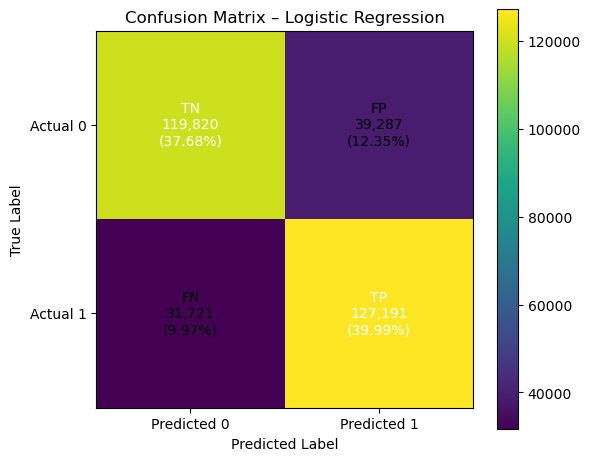

In [48]:
plot_confusion_matrix_with_metrics(y_test,y_pred_lr,"Logistic Regression")

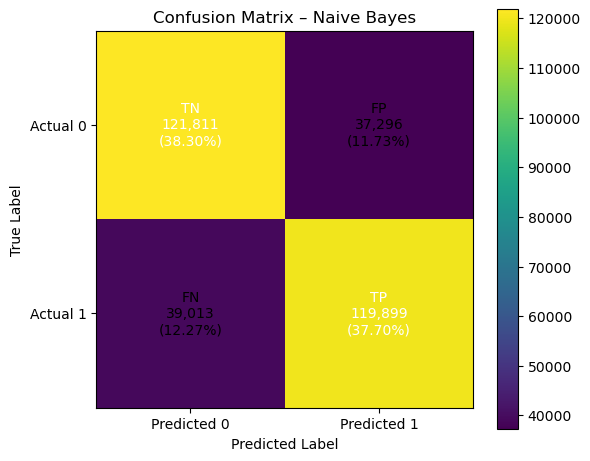

In [54]:
plot_confusion_matrix_with_metrics(y_test, y_pred_nb, "Naive Bayes")

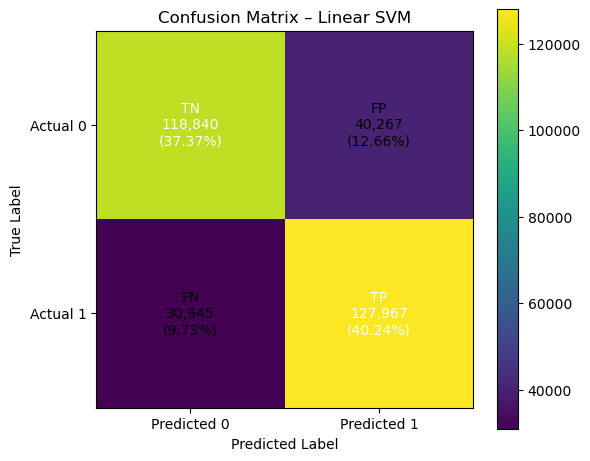

In [55]:
plot_confusion_matrix_with_metrics(y_test, y_pred_svm, "Linear SVM")

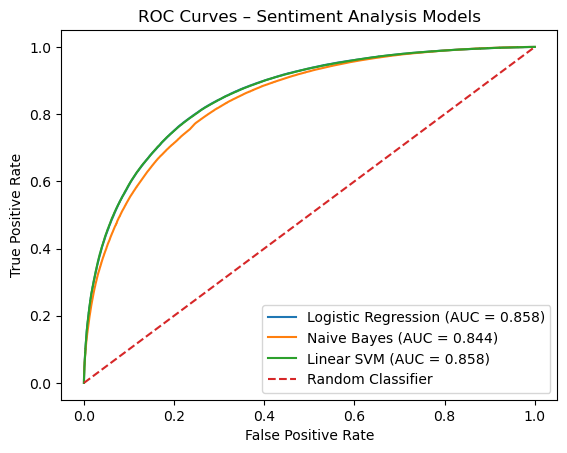

In [56]:
## ROC-AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure()

# Logistic Regression (probabilities available)
y_prob_lr = log_reg.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")

# Naive Bayes (probabilities available)
y_prob_nb = nb.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.3f})")

# Linear SVM (decision function)
y_score_svm = svm.decision_function(X_test_tfidf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)
plt.plot(fpr_svm, tpr_svm, label=f"Linear SVM (AUC = {auc_svm:.3f})")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Sentiment Analysis Models")
plt.legend()
plt.show()


In [57]:
def predict_sentiment(tweet):
    # Clean the tweet
    cleaned_tweet = clean_tweet(tweet)
    # Vectorize using trained TF-IDF
    vectorized_tweet = tfidf.transform([cleaned_tweet])
    # Predict sentiment
    prediction = svm.predict(vectorized_tweet)[0]
    # Decode label
    return "Positive" if prediction == 1 else "Negative"


In [52]:
predict_sentiment("I absolutely love this phone, the battery life is amazing!")

'Positive'

In [53]:
predict_sentiment("Worst experience ever, totally disappointed with the service")

'Negative'

# Conclusion
Selected Linear SVM as final model

## Model Evaluation
Upon evaluating all the models, I can conclude the following details i.e.

`Accuracy`: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.

`F1-score`: The F1 Scores for class 0 and class 1 are :

(a) For class 0: Logistic Regression (accuracy = 0.75) = SVM (accuracy =0.75) < Bernoulli Naive Bayes(accuracy = 0.77)

(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.75) < Logistic Regression (accuracy = 0.80) < SVM (accuracy = 0.81)

`AUC Score`: The ROC AUC score of Linear SVM (0.858) is larger than rest models, it is the best model we can have.

I, therefore, conclude that the `Linear SVM` is the best model for the above-given dataset.

Chosen due to:
- Superior performance on sparse TF-IDF features
- Lower misclassification rates
- Strong generalization capability
- Linear SVM shows superior class separation and generalization for sparse TF-IDF features.

#### From Confusion matrix:
- Highest TP and TN
- Lowest FP and FN
- Strong diagonal dominance
Output: Best performing sentiment classifier